In [170]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [171]:
#Read Data from soruces

# Read the sensor feature file (590 columns, no header)
df_features = pd.read_csv("C:/Users/Prajakta B/Desktop/SECOM_DATA/secom/secom.data",
                          delim_whitespace=True,  # or sep=' '
                          header=None)

# Read the labels file (two columns: label and timestamp)
df_labels = pd.read_csv("C:/Users/Prajakta B/Desktop/SECOM_DATA/secom/secom_labels.data",
                        delim_whitespace=True,
                        header=None)

# df_features.head()
# df_labels.head()



C:\Users\Prajakta B\AppData\Local\Temp\ipykernel_21120\1548181356.py:4: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead

C:\Users\Prajakta B\AppData\Local\Temp\ipykernel_21120\1548181356.py:9: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead



In [172]:
#Combining data and creating proper structure of table


# Loading dataset 
try:
    secom_data = pd.read_csv('C:/Users/Prajakta B/Desktop/SECOM_DATA/secom/secom.data', delim_whitespace=True, header=None)
    labels = pd.read_csv('C:/Users/Prajakta B/Desktop/SECOM_DATA/secom/secom_labels.data', delim_whitespace=True, header=None)
except FileNotFoundError as e:
    print(f"Error: {e}. Please verify file paths and names.")
    exit()
    
# Rename columns like feature_1,2.. target_1,2..
num_sensors = secom_data.shape[1]  # Number of sensor columns
new_columns = [f'feature_{i+1}' for i in range(num_sensors)] 
secom_data.columns = new_columns

labels.columns = ["is_faulty", "date_time"]

df = pd.concat([
          secom_data, labels
], axis=1)

df

C:\Users\Prajakta B\AppData\Local\Temp\ipykernel_21120\1699791772.py:6: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead

C:\Users\Prajakta B\AppData\Local\Temp\ipykernel_21120\1699791772.py:7: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead



,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590,is_faulty,date_time
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 15:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 15:13:00
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 20:49:00
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1,17/10/2008 05:26:00
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1,17/10/2008 06:01:00


In [173]:
df.info()

# -1 no fault  1 faulty
df['is_faulty'].value_counts()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, feature_1 to date_time
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


is_faulty
-1    1463
 1     104
Name: count, dtype: int64

In [174]:
# DESCRIPTIVE ANALYSIS - DUPLICATE ROWS


# Duplicate row analysis
duplicate_mask = df.duplicated(keep=False)  # Mark all duplicates
duplicate_stats = {
    'total_rows': len(df),
    'duplicated_count': df.duplicated().sum(),
    'duplicated_percentage': (df.duplicated().mean() * 100).round(2),
   'duplicates_with_same_label': df.loc[df.duplicated(), new_columns[-1]].nunique(),
    'complete_duplicates': duplicate_mask.sum()
}

# # Key statistic values
print("Duplicate Analysis Report")
for stat, value in duplicate_stats.items():
    print(f"{stat.replace('_', ' ').title()}: {value}")

# # Result
if duplicate_stats['duplicated_count'] > 0:
    print("\nSample Duplicate Rows:")
    duplicates = df[duplicate_mask].sort_values(by=list(df.columns))
    # print(duplicates.head())
else:
    print("\nNo duplicate rows found")





Duplicate Analysis Report
Total Rows: 1567
Duplicated Count: 0
Duplicated Percentage: 0.0
Duplicates With Same Label: 0
Complete Duplicates: 0

No duplicate rows found


In [175]:
#duplicate columns analysis
duplicates = df.T.duplicated(keep='first')

duplicate_col_names = df.columns[duplicates].tolist()

print("Duplicate Columns:")
print(duplicate_col_names)
print(f"Number of duplicate columns: {len(duplicate_col_names)}")
print(f"Percentage of duplicate columns: {len(duplicate_col_names) / len(df.columns) * 100:.2f}%")

# Drop duplicate columns, keeping the first occurrence
# df = df.loc[:, ~duplicates]


Duplicate Columns:
['feature_150', 'feature_180', 'feature_187', 'feature_190', 'feature_192', 'feature_193', 'feature_194', 'feature_195', 'feature_227', 'feature_230', 'feature_231', 'feature_232', 'feature_233', 'feature_234', 'feature_235', 'feature_236', 'feature_237', 'feature_238', 'feature_241', 'feature_242', 'feature_243', 'feature_244', 'feature_258', 'feature_259', 'feature_260', 'feature_261', 'feature_262', 'feature_263', 'feature_264', 'feature_265', 'feature_266', 'feature_267', 'feature_277', 'feature_285', 'feature_314', 'feature_315', 'feature_316', 'feature_323', 'feature_326', 'feature_327', 'feature_328', 'feature_329', 'feature_330', 'feature_331', 'feature_365', 'feature_370', 'feature_371', 'feature_372', 'feature_373', 'feature_374', 'feature_375', 'feature_376', 'feature_379', 'feature_380', 'feature_381', 'feature_382', 'feature_395', 'feature_396', 'feature_397', 'feature_398', 'feature_399', 'feature_400', 'feature_401', 'feature_402', 'feature_403', 'feat

In [176]:
# Descriptive Analysis - Zero volatility columns



def descriptive_analysis_zero_volatility(df):

    # Basic descriptive statistics
    desc_stats = df.describe().T  
    
    # Add variance calculation
    desc_stats['variance'] = df.var()
    
    # Identify zero-volatility columns (variance = 0)
    zero_vol_cols = desc_stats[desc_stats['variance'] == 0].index.tolist()
    
    # Calculate percentage of zero-volatility columns
    total_columns = df.shape[1]
    zero_vol_count = len(zero_vol_cols)
    zero_vol_percentage = (zero_vol_count / total_columns) * 100
    
    # Create summary report
    report = {
        # 'descriptive_stats': desc_stats,         # Full descriptive stats with variance
        'zero_volatility_cols': zero_vol_cols,   # List of zero-volatility columns
        'zero_volatility_count': zero_vol_count, # Count of zero-volatility columns
        'zero_volatility_percentage': zero_vol_percentage  # Percentage of zero-volatility columns
    }
    
    return report

#function call
analysis = descriptive_analysis_zero_volatility(secom_data)


print("Descriptive Statistics with Variance:")
print("\nZero Volatility Columns:")
print(analysis['zero_volatility_cols'])
print(f"Count: {analysis['zero_volatility_count']}")
print(f"Percentage: {analysis['zero_volatility_percentage']:.2f}%")



Descriptive Statistics with Variance:

Zero Volatility Columns:
['feature_6', 'feature_14', 'feature_43', 'feature_50', 'feature_53', 'feature_70', 'feature_98', 'feature_142', 'feature_150', 'feature_179', 'feature_180', 'feature_187', 'feature_190', 'feature_191', 'feature_192', 'feature_193', 'feature_194', 'feature_195', 'feature_227', 'feature_230', 'feature_231', 'feature_232', 'feature_233', 'feature_234', 'feature_235', 'feature_236', 'feature_237', 'feature_238', 'feature_241', 'feature_242', 'feature_243', 'feature_244', 'feature_257', 'feature_258', 'feature_259', 'feature_260', 'feature_261', 'feature_262', 'feature_263', 'feature_264', 'feature_265', 'feature_266', 'feature_267', 'feature_277', 'feature_285', 'feature_314', 'feature_315', 'feature_316', 'feature_323', 'feature_326', 'feature_327', 'feature_328', 'feature_329', 'feature_330', 'feature_331', 'feature_365', 'feature_370', 'feature_371', 'feature_372', 'feature_373', 'feature_374', 'feature_375', 'feature_376'

In [177]:
#  Descriptive Analysis - Low volatility column analysis using histogram and pareto chart

# 
feature_cols = [col for col in df.columns if col not in ['is_faulty', 'date_time']]

# Calculate variance for each feature
variances = df[feature_cols].var()

print("Variance of features:\n", variances.sort_values())
print(len(variances))



Variance of features:
 feature_506    0.000000e+00
feature_507    0.000000e+00
feature_508    0.000000e+00
feature_509    0.000000e+00
feature_326    0.000000e+00
                   ...     
feature_297    3.901065e+06
feature_25     8.425610e+06
feature_298    1.041304e+07
feature_162    1.797120e+07
feature_163    4.294927e+07
Length: 590, dtype: float64
590


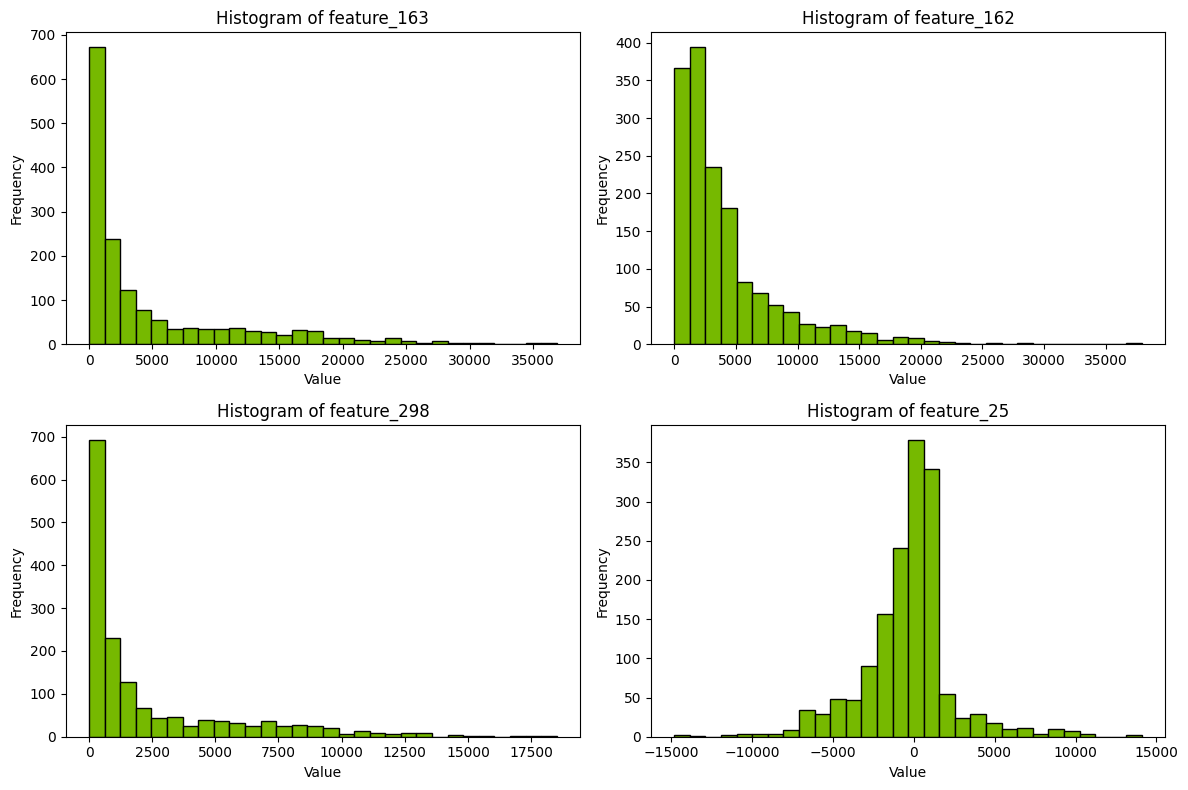

In [178]:
#Generate Histogram

# Sort variances descending
sorted_vars = variances.sort_values(ascending=False)

# Select top N features to plot (adjust N as needed)
top_n = 4  # Or however many you want
top_features = sorted_vars.head(top_n).index.tolist()  # Get feature names

# Create histograms for the top features
plt.figure(figsize=(12, 8))  # Adjust size for better readability

for i, feature in enumerate(top_features):
    plt.subplot(2, 2, i + 1)  # Create subplots for each feature
    plt.hist(df[feature], bins=30, color='#76B900', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

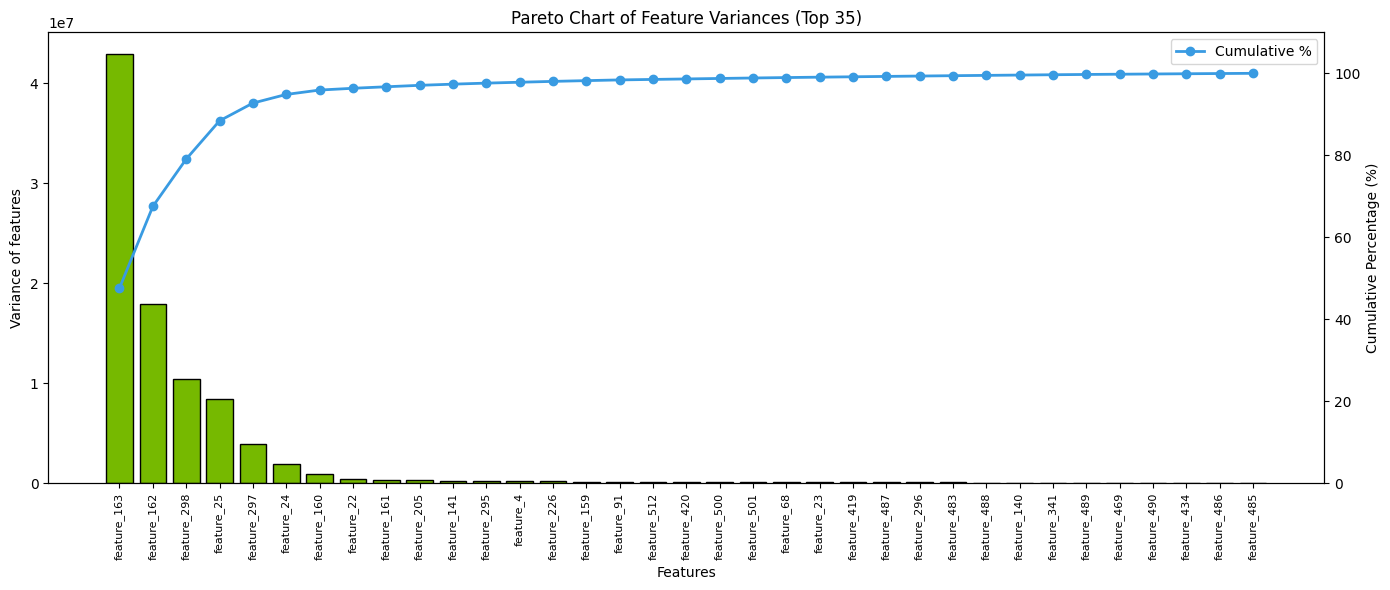

In [179]:

#Generate pareto chart



# Sort variances descending
sorted_vars = variances.sort_values(ascending=False)

# (Optional) limit to top 50 for clearer labeling:
top_n = 35
sorted_vars_top = sorted_vars[:top_n]

plt.figure(figsize=(14, 6))  # Wider for more labels on x-axis

# Bar plot: sorted variances
bars = plt.bar(range(len(sorted_vars_top)), sorted_vars_top, align='center', color='#76B900', edgecolor='black')
plt.xticks(range(len(sorted_vars_top)), sorted_vars_top.index, rotation=90, fontsize=8)
plt.title("Pareto Chart of Feature Variances (Top 35)")
plt.xlabel("Features")
plt.ylabel("Variance of features")

# Cumulative sum of variances
cum_vars = sorted_vars_top.cumsum()
cum_percent = cum_vars / cum_vars.iloc[-1] * 100

# Overlay cumulative percentage on a secondary axis
ax2 = plt.gca().twinx()
line2, = ax2.plot(range(len(sorted_vars_top)), cum_percent, color='#399be2', marker='o', linewidth=2, label='Cumulative %')
ax2.set_ylabel("Cumulative Percentage (%)")
ax2.set_ylim(0, 110) 

# Add legend for the red line
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()




In [180]:
#Low volatility analysis with Standard Daviation
# feature_cols = [col for col in df.columns if col not in ['is_faulty,'date_time']]

# Compute standard deviation for each feature column
stds = df[feature_cols].std()

# Sort them in ascending order for analysis
stds_sorted = stds.sort_values()
print("Standard Deviation per feature (ascending):\n", stds_sorted)

Standard Deviation per feature (ascending):
 feature_506       0.000000
feature_507       0.000000
feature_508       0.000000
feature_509       0.000000
feature_326       0.000000
                  ...     
feature_297    1975.111365
feature_25     2902.690117
feature_298    3226.924298
feature_162    4239.245058
feature_163    6553.569317
Length: 590, dtype: float64


Columns with std < 0.01: 171


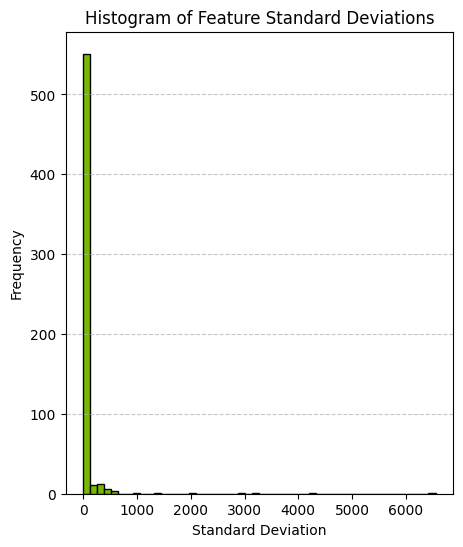

In [181]:
#Generate histogram 
import matplotlib.pyplot as plt
%matplotlib inline
# Compute standard deviation for each feature 
stds = df[feature_cols].std()

##SD < 0.01 because Stricter significance threshold	Used when stronger evidence needed
low_vol_cols = stds[stds < 0.01].index
print(f"Columns with std < 0.01: {len(low_vol_cols)}")

# Create the histogram of standard deviations
plt.figure(figsize=(5, 6)) 
plt.hist(stds, bins=50, color='#76B900', edgecolor='black') 

plt.title("Histogram of Feature Standard Deviations")
plt.xlabel("Standard Deviation")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add grid for readability
plt.show()


In [182]:
# Descriptive Analysis - Missing values using histogram and pareto chart

# Total missing values per column
missing_count = df.isnull().sum()

# Percentage of missing values per column
missing_percent = 100 * df.isnull().mean()

# Combine into a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent': missing_percent
})

# Sort by highest percentage of missing values
missing_summary = missing_summary.sort_values(by='Missing Percent', ascending=False)

print("Missing Value Summary (by column):")
print(missing_summary)



Missing Value Summary (by column):
             Missing Count  Missing Percent
feature_293           1429        91.193363
feature_294           1429        91.193363
feature_158           1429        91.193363
feature_159           1429        91.193363
feature_493           1341        85.577537
...                    ...              ...
feature_572              0         0.000000
feature_573              0         0.000000
feature_574              0         0.000000
feature_575              0         0.000000
feature_576              0         0.000000

[592 rows x 2 columns]


In [183]:
# Mising values analysis - columns missing values more than 55%
# Calculate the percentage of missing values for each column
missing_percent = df.isnull().mean() * 100

# Find columns with more than 55% missing values
cols_over_55 = missing_percent[missing_percent > 55]

# Print the results
print(f"Total number of columns: {df.shape[1]}")
print(f"Number of columns with more than 55% missing values: {len(cols_over_55)}\n")
print("Columns with >55% missing values:")
print(cols_over_55)

Total number of columns: 592
Number of columns with more than 55% missing values: 24

Columns with >55% missing values:
feature_86     85.577537
feature_110    64.964901
feature_111    64.964901
feature_112    64.964901
feature_158    91.193363
feature_159    91.193363
feature_221    85.577537
feature_245    64.964901
feature_246    64.964901
feature_247    64.964901
feature_293    91.193363
feature_294    91.193363
feature_359    85.577537
feature_383    64.964901
feature_384    64.964901
feature_385    64.964901
feature_493    85.577537
feature_517    64.964901
feature_518    64.964901
feature_519    64.964901
feature_579    60.561583
feature_580    60.561583
feature_581    60.561583
feature_582    60.561583
dtype: float64


In [184]:
#Missing values analysis pareto #399be2  #76B900


# Calculate missing value percentage per column
missing_percent = 100 * df.isnull().mean()

# Create a DataFrame for Plotly (optional, for more info on hover)
plot_df = pd.DataFrame({
    'Feature': missing_percent.index,
    'MissingPercent': missing_percent.values
})

# Create interactive histogram
fig = px.histogram(
    plot_df,
    x='MissingPercent',
    nbins=30,
    title='Histogram of Missing Value Percentages per Feature',
    labels={'MissingPercent': 'Missing Value Percentage (%)'},
    hover_data=['Feature', 'MissingPercent'],  # Show feature name and percent on hover
    color_discrete_sequence=['#76B900']
)

fig.update_layout(
    xaxis_title='Missing Value Percentage (%)',
    yaxis_title='Number of Features',
    bargap=0.1
)

fig.show()

In [186]:
# Descriptive Analysis - Correlation heatmap
# Compute the correlation matrix
%matplotlib inline
corr_matrix = df[feature_cols].corr()

# Create an interactive correlation heatmap
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='RdBu',
    zmin=-1, zmax=1,
    title='Correlation Heatmap',
    
  
)
fig.update_layout(
    xaxis_title='Features',
    yaxis_title='Features'
)
fig.show()




In [168]:
#Higly correlated columns
# Assuming df is your DataFrame and feature_cols is your list of feature columns
corr_matrix = df[feature_cols].corr()

# Set the threshold for high correlation
threshold = 0.7

# Get the upper triangle of the correlation matrix, excluding the diagonal
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs with absolute correlation above the threshold
high_corr_pairs = [
    (col1, col2, corr_matrix.loc[col1, col2])
    for col1 in upper.columns
    for col2 in upper.index
    if abs(upper.loc[col2, col1]) > threshold
]

# Convert to DataFrame for better readability
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature_Col_1', 'Feature_Col_2', 'Correlation'])

# print(high_corr_df)

#Select Highly correlated columns to drop having threshold above 0.7
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation above the threshold
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print("Columns to drop due to high correlation:")
print(to_drop)
unique = set(to_drop)
num_columns = len(unique)
print(num_columns)


Columns to drop due to high correlation:
['feature_27', 'feature_28', 'feature_31', 'feature_47', 'feature_51', 'feature_55', 'feature_61', 'feature_66', 'feature_67', 'feature_71', 'feature_99', 'feature_102', 'feature_124', 'feature_125', 'feature_128', 'feature_141', 'feature_148', 'feature_149', 'feature_153', 'feature_155', 'feature_158', 'feature_165', 'feature_166', 'feature_175', 'feature_188', 'feature_197', 'feature_198', 'feature_200', 'feature_203', 'feature_204', 'feature_205', 'feature_206', 'feature_207', 'feature_208', 'feature_210', 'feature_226', 'feature_246', 'feature_247', 'feature_250', 'feature_251', 'feature_253', 'feature_271', 'feature_272', 'feature_273', 'feature_274', 'feature_275', 'feature_276', 'feature_278', 'feature_279', 'feature_280', 'feature_281', 'feature_282', 'feature_283', 'feature_284', 'feature_286', 'feature_287', 'feature_288', 'feature_289', 'feature_290', 'feature_291', 'feature_292', 'feature_293', 'feature_294', 'feature_295', 'feature_

In [150]:
# Test & train dataset split with stratified sampling
from sklearn.model_selection import train_test_split

feature_colms = [col for col in df.columns if col not in ['is_faulty']]
# Features: all columns starting with 'feature_'
X = df[feature_colms]

# Target: 'is_faulty'
y = df['is_faulty']

# Show frequency distribution before sampling
print("Frequency distribution BEFORE sampling:")
print(y.value_counts(normalize=True).rename('proportion').to_frame())
print(y.value_counts().rename('count').to_frame())
print('-' * 40)

# Stratified train-test split (67% train, 33% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.33,        # 33% test, 67% train
    random_state=42,       # seed value
    stratify=y             # Stratified split based on is_faulty
)


# Show frequency distribution in train set
print("Frequency distribution in TRAIN set:")
print(y_train.value_counts(normalize=True).rename('proportion').to_frame())
print(y_train.value_counts().rename('count').to_frame())
print('-' * 40)

# Show frequency distribution in test set
print("Frequency distribution in TEST set:")
print(y_test.value_counts(normalize=True).rename('proportion').to_frame())
print(y_test.value_counts().rename('count').to_frame())
print('-' * 40)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)


# Display datasets
train_df
# test_df


Frequency distribution BEFORE sampling:
           proportion
is_faulty            
-1           0.933631
 1           0.066369
           count
is_faulty       
-1          1463
 1           104
----------------------------------------
Frequency distribution in TRAIN set:
           proportion
is_faulty            
-1            0.93327
 1            0.06673
           count
is_faulty       
-1           979
 1            70
----------------------------------------
Frequency distribution in TEST set:
           proportion
is_faulty            
-1           0.934363
 1           0.065637
           count
is_faulty       
-1           484
 1            34
----------------------------------------


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590,date_time,is_faulty
1263,2983.73,2459.87,2162.1333,998.9095,0.8826,100.0,104.9722,0.1246,1.3897,-0.0091,...,0.5016,0.0240,0.0053,4.7785,0.0152,0.0077,0.0029,50.5947,03/10/2008 03:52:00,-1
999,3045.11,2444.87,2215.1778,2192.1867,1.8829,100.0,85.6589,0.1237,1.4193,0.0113,...,0.5008,0.0190,0.0046,3.7891,0.0096,0.0191,0.0069,197.5077,21/09/2008 22:02:00,-1
203,2981.95,2279.48,2205.2889,1630.3112,1.2733,100.0,98.8056,0.1218,1.4334,0.0056,...,0.4965,0.0156,0.0038,3.1457,0.0123,0.0094,0.0026,76.4584,15/08/2008 05:13:00,-1
396,3127.07,2478.97,2198.7222,1534.2053,0.9374,100.0,104.1989,0.1224,1.2476,0.0170,...,0.5043,0.0089,0.0026,1.7695,0.0120,0.0104,0.0036,86.7035,22/08/2008 02:01:00,-1
193,3024.15,2521.24,2191.7889,1133.3967,1.3808,100.0,106.6711,0.1237,1.6035,0.0023,...,0.4936,0.0289,0.0065,5.8589,0.0112,0.0191,0.0058,170.4645,11/08/2008 11:35:00,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2935.94,2586.05,2164.4111,1206.6031,0.9799,100.0,100.5189,0.1220,1.4786,0.0049,...,0.5048,0.0138,0.0040,2.7309,0.0201,0.0220,0.0065,109.4273,30/07/2008 12:29:00,1
365,2988.92,2460.91,2178.0778,941.9524,0.8039,100.0,104.0167,0.1229,1.5829,-0.0278,...,0.4976,0.0148,0.0032,2.9645,0.0291,0.0135,0.0045,46.4165,21/08/2008 15:32:00,-1
1420,2975.74,2517.35,2162.5556,1041.0369,1.4305,100.0,100.4111,0.1238,1.4968,-0.0201,...,0.4994,0.0115,0.0033,2.3077,0.0299,0.0071,0.0020,23.6431,08/10/2008 10:37:00,-1
113,2928.16,2523.21,2210.6111,1184.6481,1.2577,100.0,102.9356,0.1201,1.4453,-0.0126,...,0.5016,0.0160,0.0035,3.1882,0.0049,0.0144,0.0047,293.2614,05/08/2008 06:21:00,-1
